In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import pandas as pd       
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

import warnings
warnings.filterwarnings('ignore')

import random
import os
import glob
from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from tensorflow.random import set_seed
set_seed(42)

In [5]:
IMG_SIZE = 224
BATCH = 32
SEED = 42


Read Data

In [6]:
main_path = r'/content/drive/MyDrive/TLBO_CNN_python/archive/chest_xray/chest_xray/'


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
val_path=os.path.join(main_path,"val")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

val_normal = glob.glob(val_path+"/NORMAL/*.jpeg")
val_pneumonia = glob.glob(val_path+"/PNEUMONIA/*.jpeg")

In [7]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]



test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

In [8]:
df_train

,class,image
0,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
1,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
2,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
3,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
4,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
...,...,...
5211,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
5212,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
5213,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
5214,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...


In [9]:
df_test

,class,image
0,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
1,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
2,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
3,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
4,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
...,...,...
619,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
620,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
621,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
622,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...


In [10]:
df_val

,class,image
0,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
1,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
2,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
3,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
4,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
5,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
6,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
7,Normal,/content/drive/MyDrive/TLBO_CNN_python/archive...
8,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...
9,Pneumonia,/content/drive/MyDrive/TLBO_CNN_python/archive...


EDA

In [11]:
Pneumonia = df_train[(df_train['class'] == 'Pneumonia')]
Normal = df_train[(df_train['class'] == 'Normal')]

trace = go.Bar(x = (len(Pneumonia), len(Normal)), y = ['Pneumonia', 'Normal'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of class variable in train dataset')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [12]:
trace = go.Pie(labels = ['Pneumonia', 'Normal'], values = df_train['class'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of class variable in train dataset')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [13]:
Pneumonia = df_test[(df_test['class'] == 'Pneumonia')]
Normal = df_test[(df_test['class'] == 'Normal')]

trace = go.Bar(x = (len(Pneumonia), len(Normal)), y = ['Pneumonia', 'Normal'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of class variable in test dataset')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [14]:
trace = go.Pie(labels = ['Pneumonia', 'Normal'], values = df_test['class'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of class variable in test dataset')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

Previewing the images


Train Set - Normal


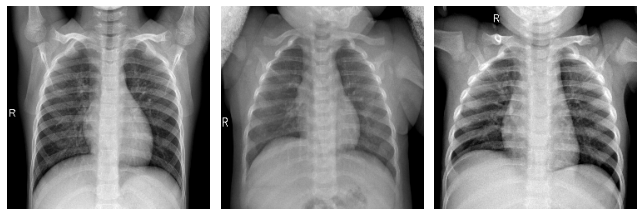

Train Set - Pneumonia


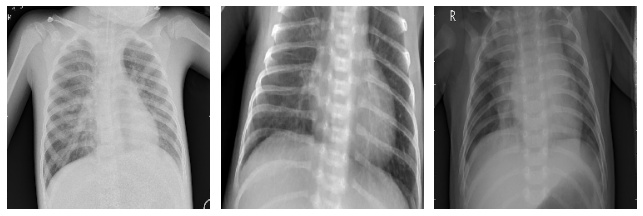

In [15]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 3):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (244,244))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()


print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 3):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (244,244))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Data Splitting

In [16]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

Data Augmentation

In [17]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


Setting callbakcs

In [18]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

ResNet

In [19]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

234545216/234545216 [==============================] - 16s 0us/step


In [20]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [21]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
130/130 [==============================] - 2764s 21s/step - loss: 0.3124 - binary_accuracy: 0.8742 - val_loss: 0.1870 - val_binary_accuracy: 0.9358 - lr: 5.0000e-05
Epoch 2/50
130/130 [==============================] - 140s 1s/step - loss: 0.1833 - binary_accuracy: 0.9305 - val_loss: 0.1485 - val_binary_accuracy: 0.9473 - lr: 5.0000e-05
Epoch 3/50
130/130 [==============================] - 142s 1s/step - loss: 0.1544 - binary_accuracy: 0.9403 - val_loss: 0.1310 - val_binary_accuracy: 0.9598 - lr: 5.0000e-05
Epoch 4/50
130/130 [==============================] - 140s 1s/step - loss: 0.1422 - binary_accuracy: 0.9511 - val_loss: 0.1207 - val_binary_accuracy: 0.9588 - lr: 5.0000e-05
Epoch 5/50
130/130 [==============================] - 142s 1s/step - loss: 0.1308 - binary_accuracy: 0.9513 - val_loss: 0.1165 - val_binary_accuracy: 0.9626 - lr: 5.0000e-05
Epoch 6/50
130/130 [==============================] - 141s 1s/step - loss: 0.1266 - binary_accuracy: 0.9518 - val_loss: 0.1090 -

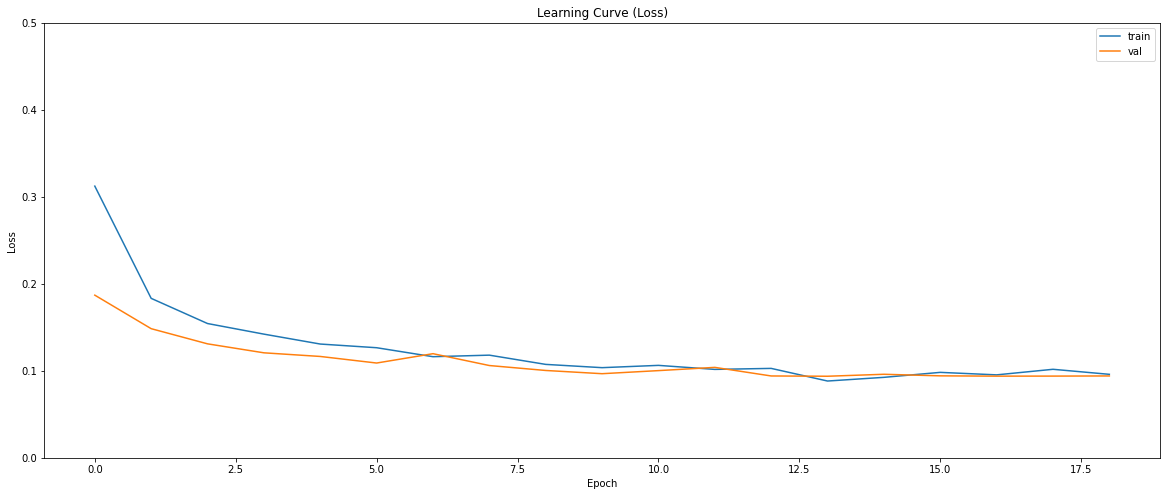

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

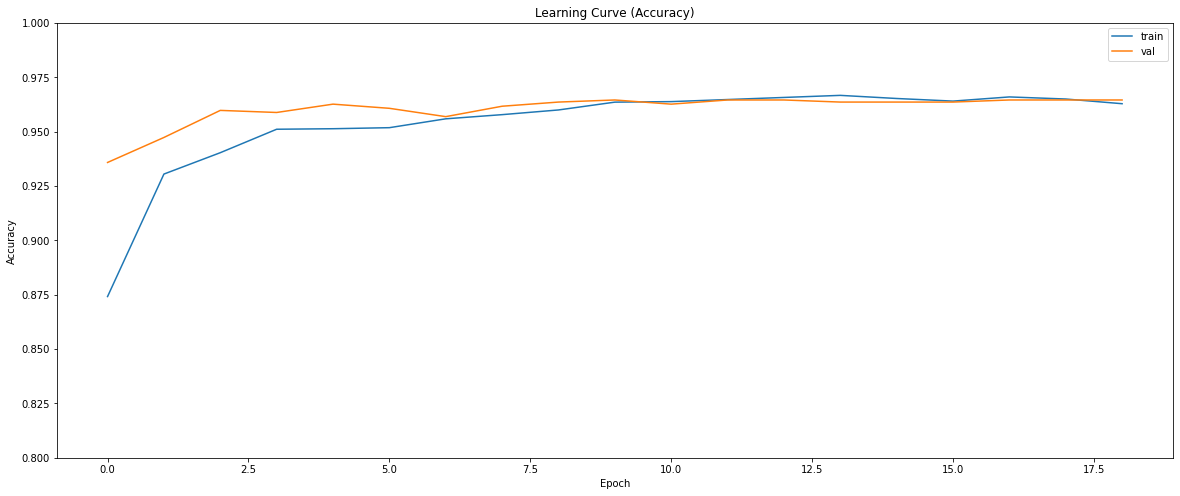

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [24]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.09376902878284454
Val accuracy: 0.9636015295982361


In [25]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.458955317735672
Test accuracy: 0.8301281929016113


Evaluation

In [26]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [27]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [28]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.8301282051282052


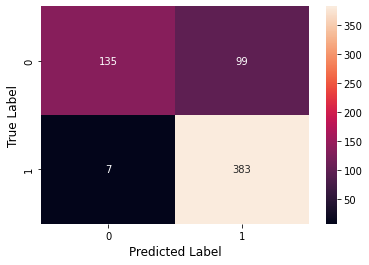

In [29]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [30]:
print(classification_report(Y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.95      0.58      0.72       234
   Normal (Class 1)       0.79      0.98      0.88       390

           accuracy                           0.83       624
          macro avg       0.87      0.78      0.80       624
       weighted avg       0.85      0.83      0.82       624



DenseNet

In [33]:
base_model = tf.keras.applications.DenseNet201(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

74836368/74836368 [==============================] - 6s 0us/step


In [34]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [35]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
130/130 [==============================] - 148s 1s/step - loss: 0.3391 - binary_accuracy: 0.8569 - val_loss: 0.2292 - val_binary_accuracy: 0.9310 - lr: 5.0000e-05
Epoch 2/50
130/130 [==============================] - 129s 994ms/step - loss: 0.1961 - binary_accuracy: 0.9307 - val_loss: 0.1759 - val_binary_accuracy: 0.9387 - lr: 5.0000e-05
Epoch 3/50
130/130 [==============================] - 128s 980ms/step - loss: 0.1642 - binary_accuracy: 0.9358 - val_loss: 0.1527 - val_binary_accuracy: 0.9425 - lr: 5.0000e-05
Epoch 4/50
130/130 [==============================] - 126s 965ms/step - loss: 0.1507 - binary_accuracy: 0.9430 - val_loss: 0.1440 - val_binary_accuracy: 0.9416 - lr: 5.0000e-05
Epoch 5/50
130/130 [==============================] - 128s 979ms/step - loss: 0.1410 - binary_accuracy: 0.9475 - val_loss: 0.1306 - val_binary_accuracy: 0.9502 - lr: 5.0000e-05
Epoch 6/50
130/130 [==============================] - 125s 960ms/step - loss: 0.1264 - binary_accuracy: 0.9518 - val_l

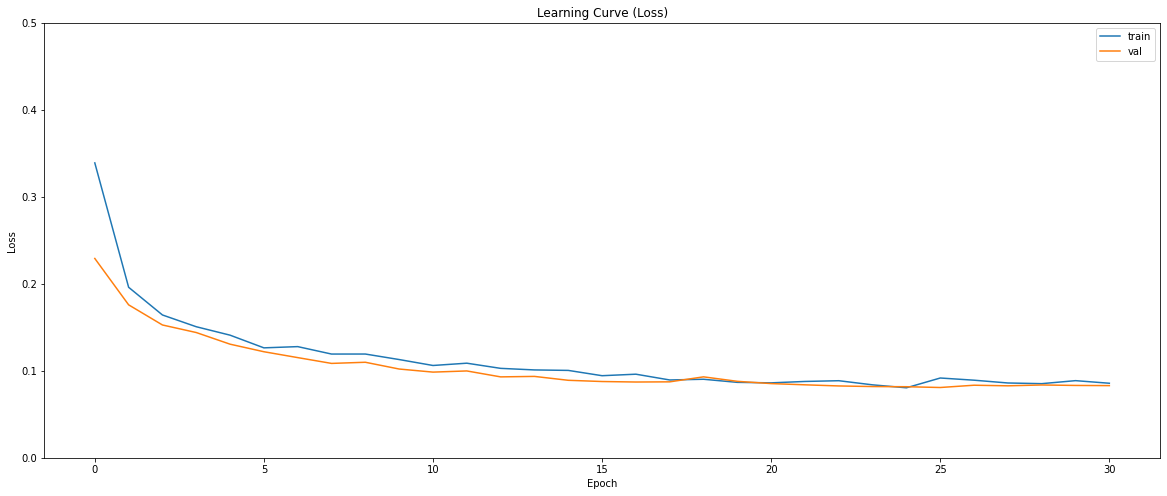

In [36]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

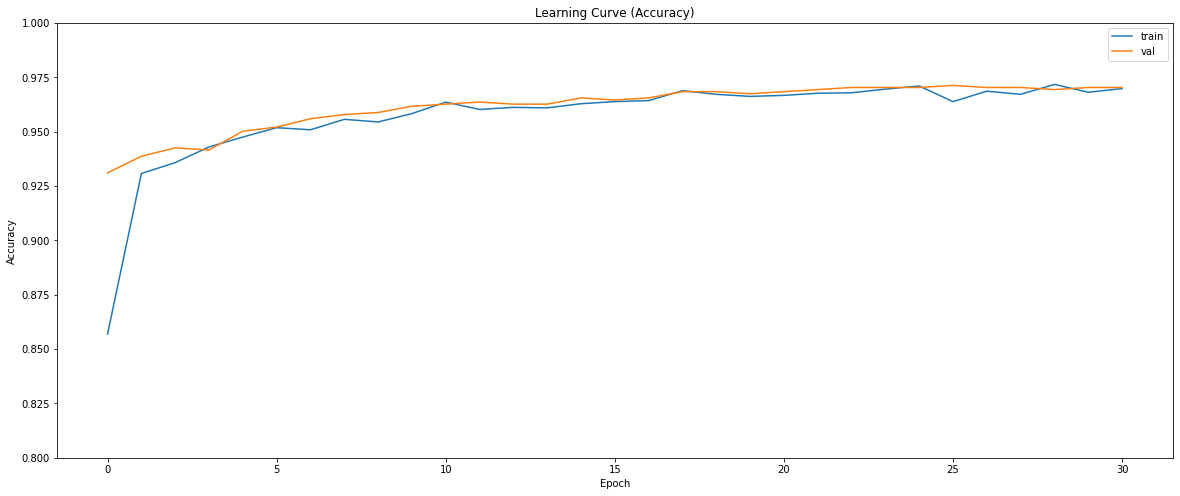

In [37]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [38]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.08082309365272522
Val accuracy: 0.9712643623352051


In [39]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.37246063351631165
Test accuracy: 0.8413461446762085


Evoluation 2

In [42]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [43]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [44]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.8413461538461539


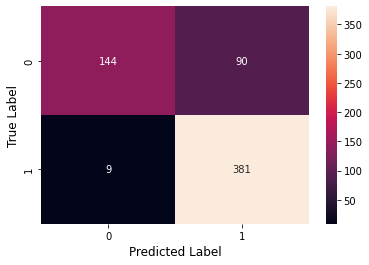

In [45]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [46]:
print(classification_report(Y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.62      0.74       234
   Normal (Class 1)       0.81      0.98      0.89       390

           accuracy                           0.84       624
          macro avg       0.88      0.80      0.81       624
       weighted avg       0.86      0.84      0.83       624

